In [1]:
!pip install chardet matplotlib

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (324 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp310-cp310-manylinux_2_17_x86_64.manyl

총 파일 개수: 29098
count    29098.000000
mean        10.906272
std          7.745301
min          1.355750
50%          8.935219
95%         25.798716
99%         39.006255
max         69.096688
Name: speech_length, dtype: float64


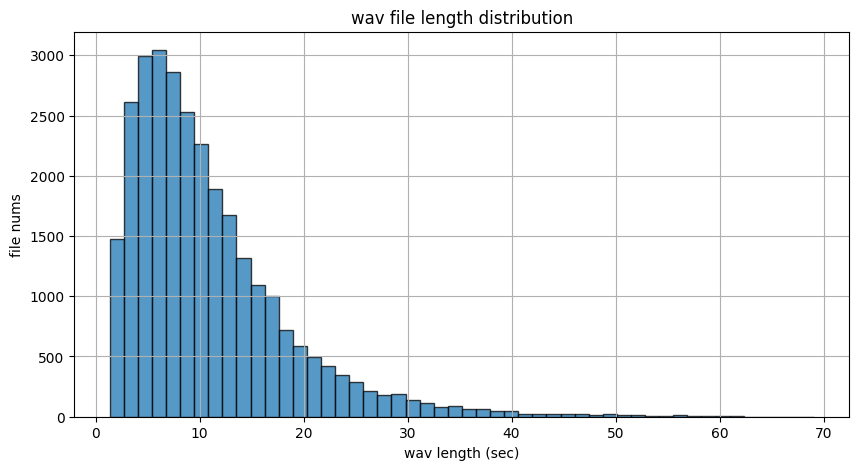

In [5]:
# json 파일 안에 음성 길이가 명시되어있음. 이 정보를 통하여 음성 데이터 길이 분포 확인하는 코드

import os
import json
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# JSON 데이터 경로
data_dirs = [
    "/data/seungmin/dataset/kr_univ_training_processed/number_or_english",
    # "/data/seungmin/dataset/kr_univ_validation_processed/number_or_english"
]

# JSON 파일 목록 가져오기 (._ 파일 제외)
json_files = []
for data_dir in data_dirs:
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".json") and not file.startswith("._"):  # `._` 파일 제외
                json_files.append(os.path.join(root, file))

# 음성 길이 데이터 수집
lengths = []

for json_file in json_files:
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)

        # JSON이 비어 있거나 유효하지 않은 경우 예외 처리
        if not data or "01_dataset" not in data or "9_speech_length" not in data["01_dataset"]:
            print(f" 무시된 JSON 파일- 손상되었거나 데이터 없음 : {json_file}")
            continue

        lengths.append(float(data["01_dataset"]["9_speech_length"]))

    except (json.JSONDecodeError, ValueError):
        print(f"@@@@@ JSONDecodeError: {json_file} (파일이 손상됨)")
    except Exception as e:
        print(f"@@@@@ 기타 오류 발생: {json_file} (오류: {e})")

# Pandas 데이터프레임 생성
df = pd.DataFrame({"speech_length": lengths})


# 기본 통계 출력
print("총 파일 개수:", len(df))
print(df["speech_length"].describe(percentiles=[0.95, 0.99]))

# 히스토그램 시각화
plt.figure(figsize=(10, 5))
plt.hist(df["speech_length"], bins=50, alpha=0.75, edgecolor="black")
plt.xlabel("wav length (sec)")
plt.ylabel("file nums")
plt.title("wav file length distribution")
plt.grid(True)
plt.show()

감지된 wav 파일 개수: 2797
감지된 txt 파일 개수: 2797


총 파일 개수: 13030
count    13030.000000
mean         8.950650
std          6.643689
min          1.025688
50%          7.261875
95%         21.843853
99%         32.539917
max         60.002437
Name: speech_length, dtype: float64


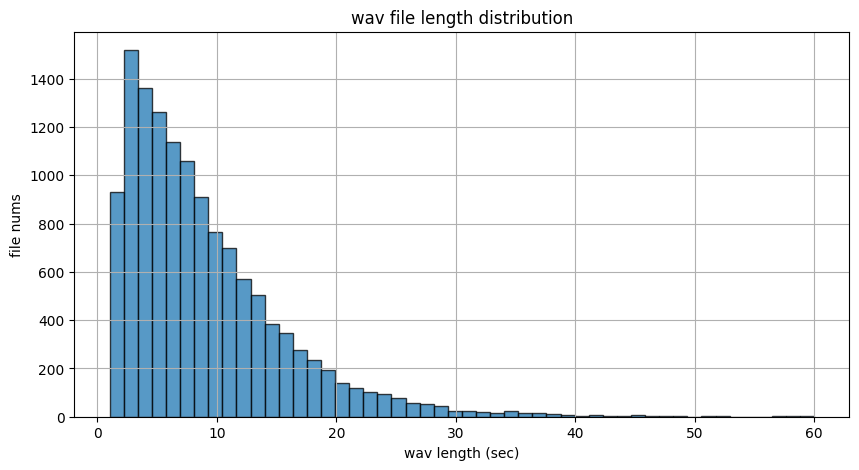

In [4]:
# 음성 데이터 길이 분포 확인하는 코드

# validation

import os
import json
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# JSON 데이터 경로
data_dirs = [
    "/data/seungmin/dataset/kr_univ_lec/validation/labels/eng/arch/"
]

# JSON 파일 목록 가져오기 (._ 파일 제외)
json_files = []
for data_dir in data_dirs:
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".json") and not file.startswith("._"):  # `._` 파일 제외
                json_files.append(os.path.join(root, file))

# 음성 길이 데이터 수집
lengths = []

for json_file in json_files:
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)

        # JSON이 비어 있거나 유효하지 않은 경우 예외 처리
        if not data or "01_dataset" not in data or "9_speech_length" not in data["01_dataset"]:
            print(f" 무시된 JSON 파일- 손상되었거나 데이터 없음 : {json_file}")
            continue

        lengths.append(float(data["01_dataset"]["9_speech_length"]))

    except (json.JSONDecodeError, ValueError):
        print(f"@@@@@ JSONDecodeError: {json_file} (파일이 손상됨)")
    except Exception as e:
        print(f"@@@@@ 기타 오류 발생: {json_file} (오류: {e})")

# Pandas 데이터프레임 생성
df = pd.DataFrame({"speech_length": lengths})


# 기본 통계 출력
print("총 파일 개수:", len(df))
print(df["speech_length"].describe(percentiles=[0.95, 0.99]))

# 히스토그램 시각화
plt.figure(figsize=(10, 5))
plt.hist(df["speech_length"], bins=50, alpha=0.75, edgecolor="black")
plt.xlabel("wav length (sec)")
plt.ylabel("file nums")
plt.title("wav file length distribution")
plt.grid(True)
plt.show()